In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s6e1/sample_submission.csv
/kaggle/input/playground-series-s6e1/train.csv
/kaggle/input/playground-series-s6e1/test.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (Kaggle playground S6E1)
df_train = pd.read_csv('/kaggle/input/playground-series-s6e1/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s6e1/test.csv')

# Basic information
print("Train data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("\nColumn names in Train:")
print(df_train.columns.tolist())

# First five rows of train data
print("\nFirst five rows of train data:")
display(df_train.head())

# Check data types and missing values
print("\nData type and missing values in train data:")
print(df_train.info())

# Statistical summary
print("\nStatistical summary:")
display(df_train.describe())

# Missing values count
print("\nMissing values count in Train:")
print(df_train.isnull().sum())

# Duplicate row check
print("\nDuplicate row check in Train:")
print(df_train.duplicated().sum())

Train data shape: (630000, 13)
Test data shape: (270000, 12)

Column names in Train:
['id', 'age', 'gender', 'course', 'study_hours', 'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty', 'exam_score']

First five rows of train data:


,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0



Data type and missing values in train data:
<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  str    
 3   course            630000 non-null  str    
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  str    
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  str    
 9   study_method      630000 non-null  str    
 10  facility_rating   630000 non-null  str    
 11  exam_difficulty   630000 non-null  str    
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), str(7)
memory usage: 84.8 MB
None

Statistical summary:


,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000



Missing values count in Train:
id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

Duplicate row check in Train:
0


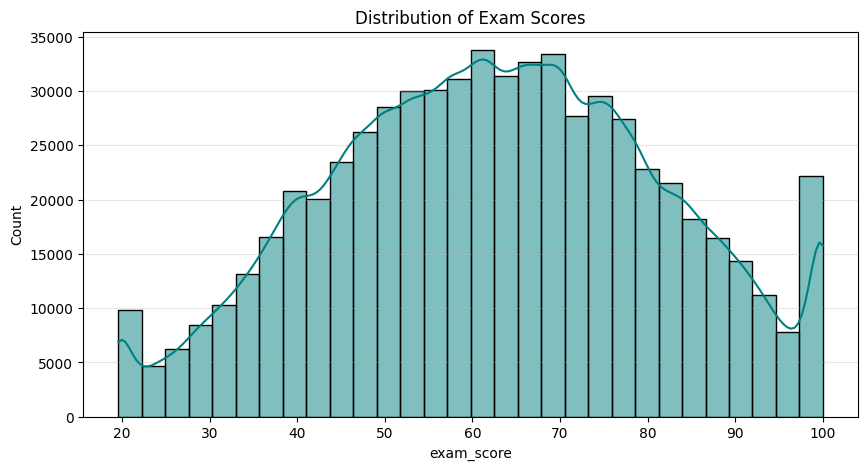

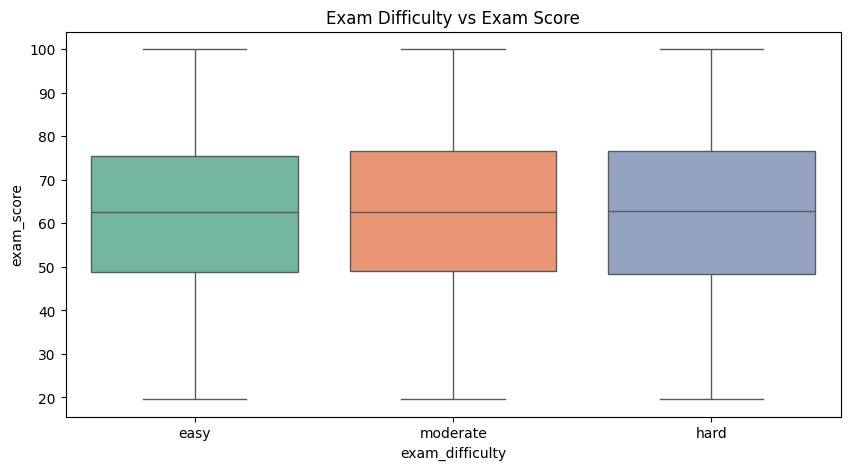

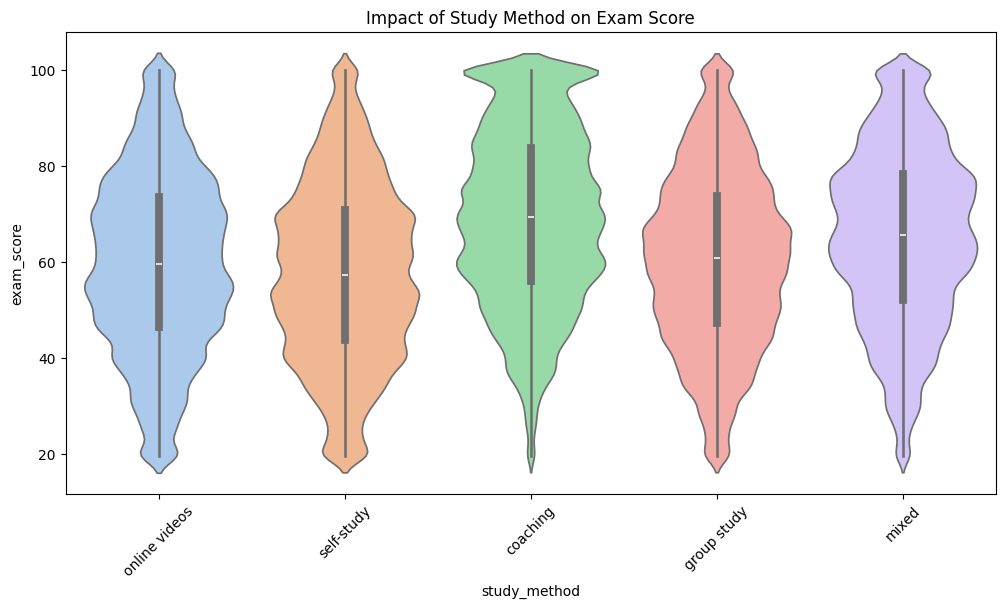

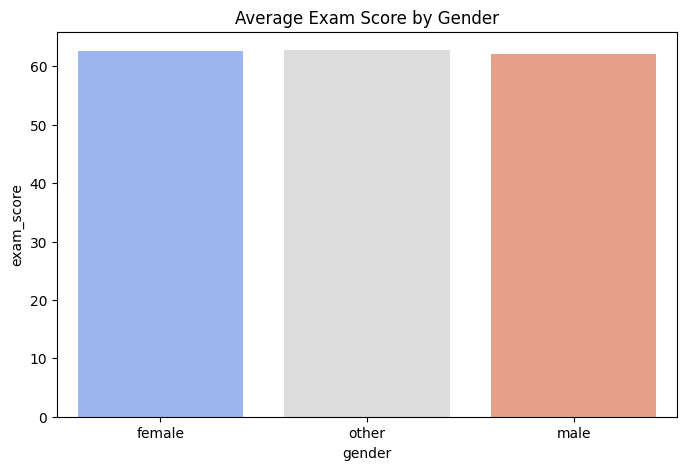

In [5]:
# 1. Target Variable (exam_score) Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_train['exam_score'], kde=True, color='teal', bins=30)
plt.title('Distribution of Exam Scores')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 2. Exam Difficulty vs Exam Score (Fixed Palette warning)
plt.figure(figsize=(10, 5))
sns.boxplot(x='exam_difficulty', y='exam_score', data=df_train, hue='exam_difficulty', palette='Set2', legend=False)
plt.title('Exam Difficulty vs Exam Score')
plt.show()

# 3. Study Method vs Exam Score (Fixed Palette warning)
plt.figure(figsize=(12, 6))
sns.violinplot(x='study_method', y='exam_score', data=df_train, hue='study_method', palette='pastel', legend=False)
plt.title('Impact of Study Method on Exam Score')
plt.xticks(rotation=45)
plt.show()

# 4. Gender-wise Performance (Fixed ci and palette warning)
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='exam_score', data=df_train, hue='gender', palette='coolwarm', errorbar=None, legend=False)
plt.title('Average Exam Score by Gender')
plt.show()

In [6]:
# --- Step 4: Professional Data Preprocessing ---

# 1. Drop 'id' column as we found 0 correlation in Heatmap
train_ids = df_train['id'] # Optional: keep train ids if needed
test_ids = df_test['id']   # Essential: keep test ids for Kaggle submission
df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)

# 2. Ordinal Encoding (Mapping logic based on importance)
# Difficulty mapping
diff_map = {'easy': 1, 'moderate': 2, 'hard': 3}
df_train['exam_difficulty'] = df_train['exam_difficulty'].map(diff_map)
df_test['exam_difficulty'] = df_test['exam_difficulty'].map(diff_map)

# Facility rating mapping
facility_map = {'low': 1, 'medium': 2, 'high': 3}
df_train['facility_rating'] = df_train['facility_rating'].map(facility_map)
df_test['facility_rating'] = df_test['facility_rating'].map(facility_map)

# 3. Label Encoding (For multi-category columns)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_cols = ['course', 'study_method', 'sleep_quality']
for col in label_cols:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

# 4. One-Hot Encoding (For Binary/Nominal categories)
# apply get_dummies and ensure we don't have too many columns
df_train = pd.get_dummies(df_train, columns=['gender', 'internet_access'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['gender', 'internet_access'], drop_first=True)

# Convert boolean (True/False) from get_dummies to integers (1/0)
df_train = df_train.astype({'gender_male': int, 'gender_other': int, 'internet_access_yes': int})
df_test = df_test.astype({'gender_male': int, 'gender_other': int, 'internet_access_yes': int})

# Final check of the processed data
print("Final Train Columns:", df_train.columns.tolist())
print("\nProcessed Train Data Head:")
display(df_train.head())

Final Train Columns: ['age', 'course', 'study_hours', 'class_attendance', 'sleep_hours', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty', 'exam_score', 'gender_male', 'gender_other', 'internet_access_yes']

Processed Train Data Head:


,age,course,study_hours,class_attendance,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,gender_male,gender_other,internet_access_yes
0,21,1,7.91,98.8,4.9,0,3,1,1,78.3,0,0,0
1,18,6,4.95,94.8,4.7,2,4,2,2,46.7,0,1,1
2,20,1,4.68,92.6,5.8,2,0,3,2,99.0,0,0,1
3,19,1,2.00,49.5,8.3,0,1,3,2,63.9,1,0,1
4,23,5,7.65,86.9,9.6,1,4,3,1,100.0,1,0,1


In [7]:
# --- Step 5: Strategic Feature Engineering ---

# 1. Study Efficiency:
# (Adding a small constant to avoid division by zero)
df_train['study_efficiency'] = df_train['study_hours'] / (df_train['class_attendance'] + 1)
df_test['study_efficiency'] = df_test['study_hours'] / (df_test['class_attendance'] + 1)

# 2. Total Effort Score: 
df_train['total_effort'] = df_train['study_hours'] * df_train['class_attendance']
df_test['total_effort'] = df_test['study_hours'] * df_test['class_attendance']

# 3. Rest vs Study Ratio: 
df_train['balance_score'] = df_train['sleep_hours'] / (df_train['study_hours'] + 1)
df_test['balance_score'] = df_test['sleep_hours'] / (df_test['study_hours'] + 1)

# 4. Impact of Environment: 
# (Assuming internet_access_yes is now 0 or 1)
df_train['env_support'] = df_train['facility_rating'] + df_train['internet_access_yes']
df_test['env_support'] = df_test['facility_rating'] + df_test['internet_access_yes']

# 5. Interaction: 
df_train['difficulty_stress'] = df_train['study_hours'] * df_train['exam_difficulty']
df_test['difficulty_stress'] = df_test['study_hours'] * df_test['exam_difficulty']

# Final check to see new features
print("New Features Added. Total Columns:", len(df_train.columns))
display(df_train.head())

New Features Added. Total Columns: 18


,age,course,study_hours,class_attendance,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,gender_male,gender_other,internet_access_yes,study_efficiency,total_effort,balance_score,env_support,difficulty_stress
0,21,1,7.91,98.8,4.9,0,3,1,1,78.3,0,0,0,0.079259,781.508,0.549944,1,7.91
1,18,6,4.95,94.8,4.7,2,4,2,2,46.7,0,1,1,0.051670,469.260,0.789916,3,9.90
2,20,1,4.68,92.6,5.8,2,0,3,2,99.0,0,0,1,0.050000,433.368,1.021127,4,9.36
3,19,1,2.00,49.5,8.3,0,1,3,2,63.9,1,0,1,0.039604,99.000,2.766667,4,4.00
4,23,5,7.65,86.9,9.6,1,4,3,1,100.0,1,0,1,0.087031,664.785,1.109827,4,7.65


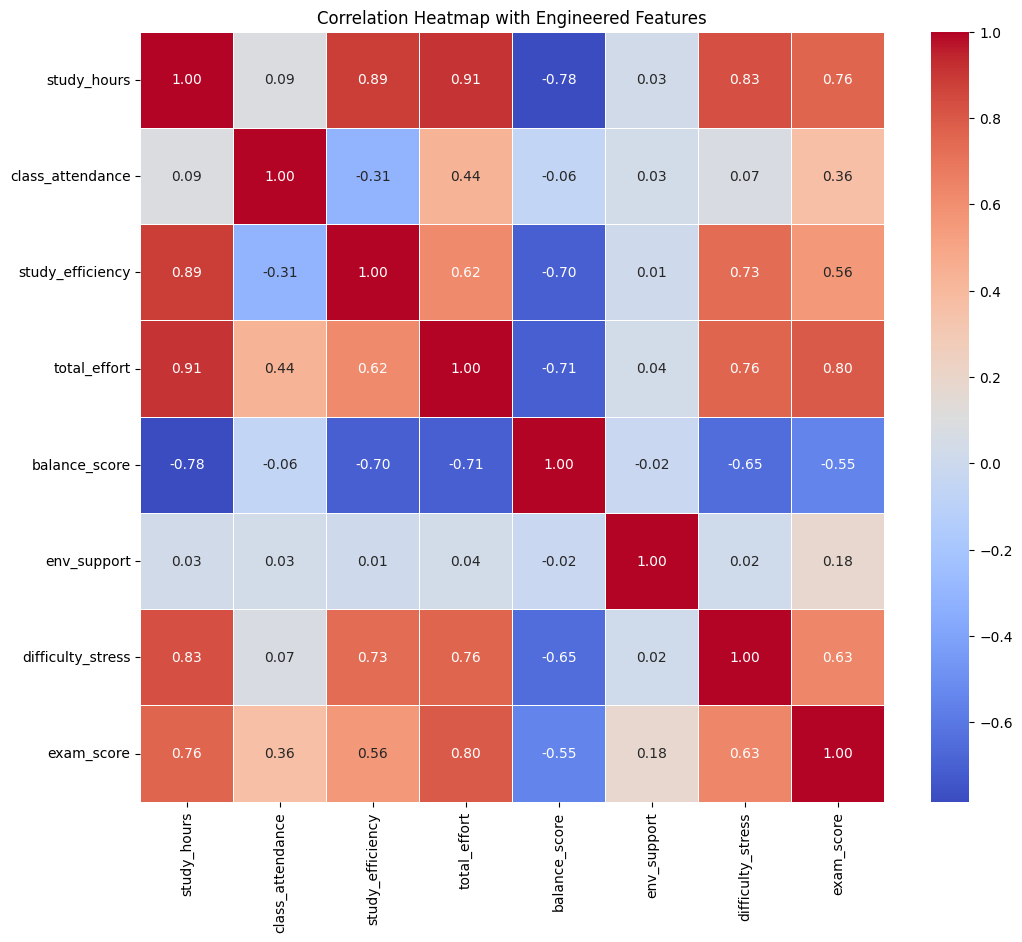

Top correlations with Exam Score:
exam_score           1.000000
total_effort         0.796722
study_hours          0.762267
difficulty_stress    0.633393
study_efficiency     0.560375
class_attendance     0.360954
env_support          0.178678
balance_score       -0.549923
Name: exam_score, dtype: float64


In [8]:
# --- Step 5.1: Heatmap for New Features ---

# Select new features + target for correlation analysis
new_features = ['study_hours', 'class_attendance', 'study_efficiency', 
                'total_effort', 'balance_score', 'env_support', 
                'difficulty_stress', 'exam_score']

plt.figure(figsize=(12, 10))
sns.heatmap(df_train[new_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap with Engineered Features')
plt.show()

# Print top correlations with target
print("Top correlations with Exam Score:")
print(df_train[new_features].corr()['exam_score'].sort_values(ascending=False))

In [9]:
# --- Step 5.2: Deep Interaction Features ---

# 1. High Performer Indicator: 
mean_study = df_train['study_hours'].mean()
mean_attendance = df_train['class_attendance'].mean()

df_train['is_hardworking'] = ((df_train['study_hours'] > mean_study) & 
                              (df_train['class_attendance'] > mean_attendance)).astype(int)
df_test['is_hardworking'] = ((df_test['study_hours'] > mean_study) & 
                             (df_test['class_attendance'] > mean_attendance)).astype(int)

# 2. Score Potential: 
df_train['score_potential'] = df_train['study_method'] * df_train['facility_rating']
df_test['score_potential'] = df_test['study_method'] * df_test['facility_rating']

# 3. Polynomial Feature: study_hours 
df_train['study_hours_sq'] = df_train['study_hours'] ** 2
df_test['study_hours_sq'] = df_test['study_hours'] ** 2

print("Advanced Features Added. Final Columns:", df_train.columns.tolist())

Advanced Features Added. Final Columns: ['age', 'course', 'study_hours', 'class_attendance', 'sleep_hours', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty', 'exam_score', 'gender_male', 'gender_other', 'internet_access_yes', 'study_efficiency', 'total_effort', 'balance_score', 'env_support', 'difficulty_stress', 'is_hardworking', 'score_potential', 'study_hours_sq']


In [10]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 81.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 MB 15.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# 1. Separate features and target
X = df_train.drop(['exam_score'], axis=1)
y = df_train['exam_score']

# 2. Identify all numeric columns
all_features = X.columns.tolist()

# Preprocessor: Scaling via Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', RobustScaler(), all_features)
])

# 3. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define Base Models
model_lr = LinearRegression()
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
model_gb = GradientBoostingRegressor(random_state=42)

# 5. Voting Regressor
voting_reg = VotingRegressor(
    estimators=[
        ('lr', model_lr),
        ('xgb', model_xgb),
        ('gb', model_gb)
    ]
)

# Dictionary of models to train
models_to_train = {
    'Linear Regression': model_lr,
    'XGBoost': model_xgb,
    'Gradient Boosting': model_gb,
    'Voting Ensemble': voting_reg
}

print(f"{len(models_to_train)} Models defined. Starting Training...\n")

# 6. Train and evaluate
results = []

for name, model in models_to_train.items():
    print(f"Training {name}...")
    
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    
    # Metrics
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R2 Score': r2
    })
    print(f" {name} Done - RMSE: {rmse:.4f}")

# Display Comparison
results_df = pd.DataFrame(results).sort_values('RMSE', ascending=True)
print("\n" + "="*30)
print("FINAL MODEL COMPARISON")
print("="*30)
display(results_df)

4 Models defined. Starting Training...

Training Linear Regression...
✅ Linear Regression Done - RMSE: 9.5844
Training XGBoost...
✅ XGBoost Done - RMSE: 8.8109
Training Gradient Boosting...
✅ Gradient Boosting Done - RMSE: 8.8732
Training Voting Ensemble...
✅ Voting Ensemble Done - RMSE: 8.9317

FINAL MODEL COMPARISON


,Model,RMSE,R2 Score
1,XGBoost,8.810920,0.781715
2,Gradient Boosting,8.873216,0.778618
3,Voting Ensemble,8.931668,0.775691
0,Linear Regression,9.584380,0.741709


In [12]:
# --- Step 7: Overfitting Check & Sample Analysis ---

overfit_results = []

for name, model in models_to_train.items():
    # Create the pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the model
    pipe.fit(X_train, y_train)

    # Get RMSE for both train and validation sets
    train_rmse = np.sqrt(mean_squared_error(y_train, pipe.predict(X_train)))
    val_rmse = np.sqrt(mean_squared_error(y_val, pipe.predict(X_val)))

    overfit_results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Val RMSE': val_rmse,
        'Difference': abs(train_rmse - val_rmse)
    })

# Display Overfitting Table
overfit_df = pd.DataFrame(overfit_results).sort_values('Difference')
print("OVERFITTING CHECK RESULTS (Lower Difference is Better):")
display(overfit_df)

# --- Sample Predictions using the Best Model (XGBoost) ---
best_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model_xgb)
])
best_pipe.fit(X_train, y_train)
y_final_pred = best_pipe.predict(X_val)

sample_results = pd.DataFrame({
    'Actual Score': y_val.head(15).values,
    'Predicted Score': np.round(y_final_pred[:15], 2),
    'Error': np.abs(y_val.head(15).values - y_final_pred[:15])
})

print("\nSample Predictions (First 15):")
display(sample_results)

OVERFITTING CHECK RESULTS (Lower Difference is Better):


,Model,Train RMSE,Val RMSE,Difference
2,Gradient Boosting,8.874036,8.873216,0.000820
0,Linear Regression,9.593187,9.584380,0.008807
3,Voting Ensemble,8.918705,8.931668,0.012963
1,XGBoost,8.760626,8.810920,0.050294



Sample Predictions (First 15):


,Actual Score,Predicted Score,Error
0,51.3,60.730000,9.430389
1,50.6,48.029999,2.569742
2,79.9,61.669998,18.229025
3,55.4,59.820000,4.417757
4,50.4,46.840000,3.561583
5,46.2,66.839996,20.643933
6,73.3,80.400002,7.099826
7,89.8,75.050003,14.747067
8,21.1,36.270000,15.174467
9,41.1,37.900002,3.204877


In [13]:
from sklearn.model_selection import cross_val_score

# --- Step 8: Hyperparameter Tuning (XGBoost) ---

tuned_xgb = XGBRegressor(
    n_estimators=500,         
    learning_rate=0.05,       
    max_depth=6,              
    subsample=0.8,            
    colsample_bytree=0.8,      
    n_jobs=-1,
    random_state=42
)


tuned_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', tuned_xgb)
])

print("Running Cross-Validation... (It may take a minute)")
cv_scores = cross_val_score(tuned_pipe, X, y, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
avg_rmse = -cv_scores.mean()

print(f"\nAverage Cross-Validated RMSE: {avg_rmse:.4f}")

tuned_pipe.fit(X_train, y_train)
y_tuned_pred = tuned_pipe.predict(X_val)
new_rmse = np.sqrt(mean_squared_error(y_val, y_tuned_pred))

print(f"New Validation RMSE after Tuning: {new_rmse:.4f}")

Running Cross-Validation... (It may take a minute)

Average Cross-Validated RMSE: 8.7746
New Validation RMSE after Tuning: 8.7645


In [15]:
# --- Step 9: Final Prediction on Test Set ---

print("Training final model on full training dataset...")
final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', tuned_xgb)
])

# Full data training (X and y represent the entire train set)
final_pipe.fit(X, y)

print("Generating predictions for test.csv...")
test_preds = final_pipe.predict(df_test)

submission = pd.DataFrame({
    'id': test_ids,
    'exam_score': test_preds
})


submission.to_csv('submission_v1.csv', index=False)

print("\n Submission file 'submission_v1.csv' created successfully!")
display(submission.head())

Training final model on full training dataset...
Generating predictions for test.csv...

🎉 Submission file 'submission_v1.csv' created successfully!


,id,exam_score
0,630000,71.281372
1,630001,67.869675
2,630002,88.370621
3,630003,55.463879
4,630004,48.257332
